In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df =pd.read_csv('../../datas/E4_3/E3_all_alert_panne_indicator.csv', sep=',')

In [9]:
for col in df.columns:
    print(col)

datetime
BP [R]_C1
HP [R]_C1
O2 [R]_C1
CO2 [R]_C1
O2_MMOL [R]_C1
POIDS_1 [R]_C1
POIDS_2 [R]_C1
POIDS_3 [R]_C1
CO2_MMOL [R]_C1
DEFAUT_BP [B]_C1
DEFAUT_HP [B]_C1
A_SECONDES [I]_C1
IRRADIANCE [I]_C1
REARMEMENT [B]_C1
ARU_CELLULE [B]_C1
CONSIGNE_O2 [I]_C1
Etat_Mesure [B]_C1
POIDS_TOTAL [R]_C1
BALLON_CHAUD [R]_C1
BALLON_FROID [R]_C1
CONSIGNE_CO2 [I]_C1
MA_VARIATEUR [B]_C1
COMPRESSEUR_1 [B]_C1
COMPRESSEUR_2 [B]_C1
POMPE_INF_ECO [B]_C1
POMPE_SUP_ECO [B]_C1
PPM_O2_HUMIDE [R]_C1
V2V_AIR_VICIE [B]_C1
V2V_EAU_PLUIE [I]_C1
HAUTEUR_ECOLUX [I]_C1
HUMIDIFICATEUR [I]_C1
POMPE_FOND_ECO [B]_C1
PPM_CO2_HUMIDE [I]_C1
V2V_DESHUMIDIF [B]_C1
VANNE_PROP_INF [I]_C1
VANNE_PROP_SUP [I]_C1
FERMETURE_PORTE [B]_C1
MOLE_O2_DERIVEE [R]_C1
POMPE_UTA_CHAUD [B]_C1
POMPE_UTA_FROID [B]_C1
V2V_CAPTAGE_CO2 [B]_C1
VANNE_PROP_FOND [I]_C1
VANNE_UTA_CHAUD [I]_C1
VANNE_UTA_FROID [I]_C1
VENTILATEUR_CTA [B]_C1
MOLE_CO2_DERIVEE [R]_C1
ORIGINE_COLONNES [B]_C1
V2V_INJECTION_N2 [B]_C1
V2V_INJECTION_O2 [B]_C1
V2V_INJ_AIR_NEUF [B]_C1
VI

In [123]:

df['datetime'] = pd.to_datetime(df['datetime'])

df['cut_connection'] = ((df['datetime'] >= '2025-04-16 16:00:00') &
                      (df['datetime'] <= '2025-04-17 09:00:00')).astype(int)

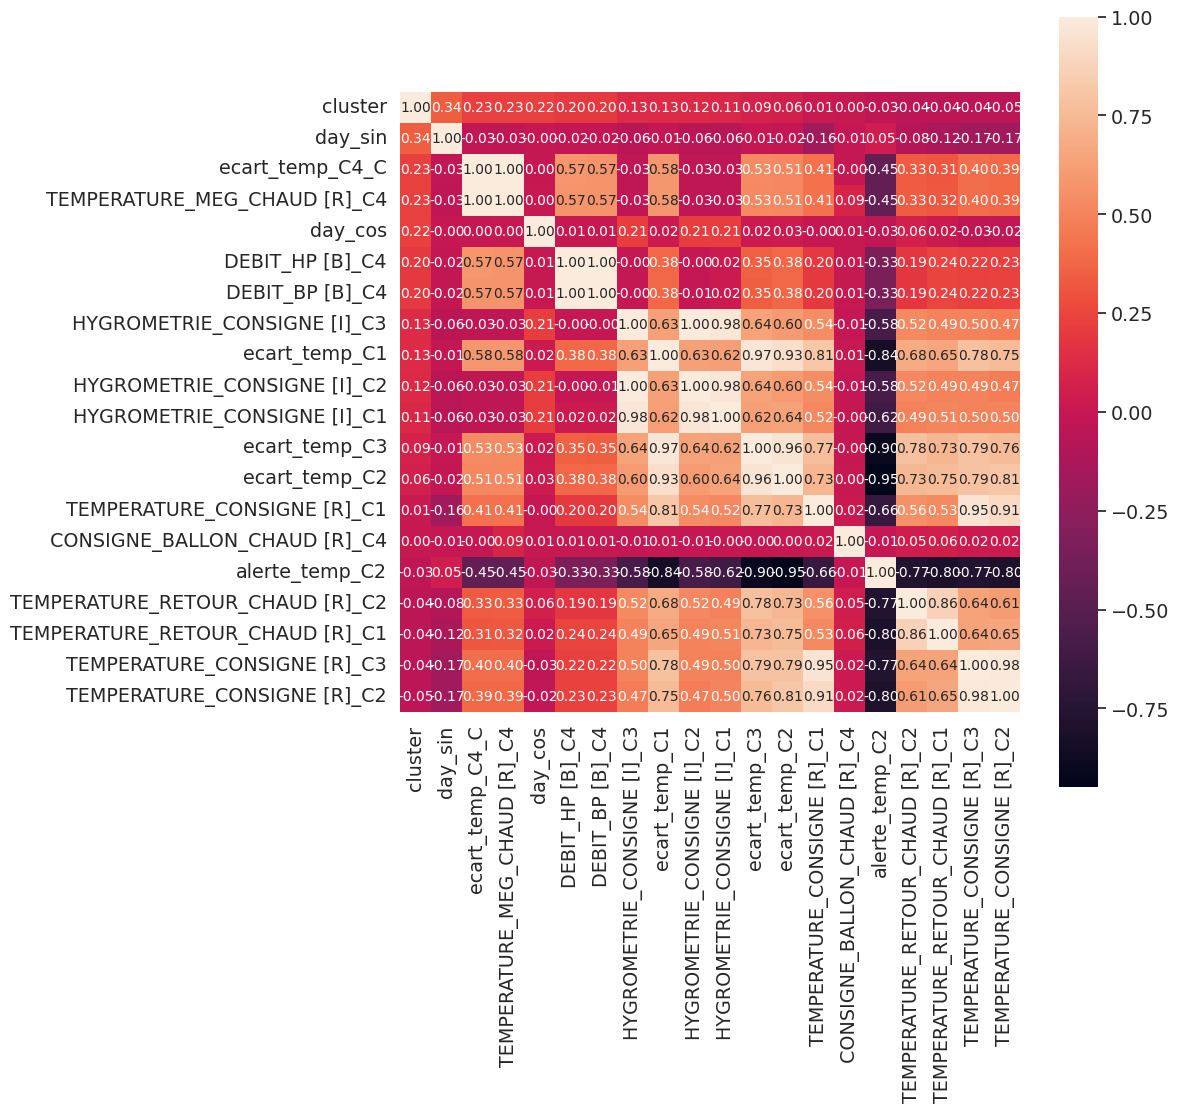

In [15]:
corrmat = df[[

    "ecart_temp_C1",
"alerte_temp_C1",
"ecart_temp_C2",
"alerte_temp_C2",
"ecart_temp_C3",
"alerte_temp_C3",
            'ecart_temp_C4_C',
            'ecart_temp_C4_F',
            'TEMPERATURE_MEG_FROID [R]_C4',
            'TEMPERATURE_MEG_CHAUD [R]_C4',
             'BP_R134_EN_BARS [R]_C4',
            'BP_R134_EN_DEGRES [R]_C4',
            'HP_R134_EN_BARS [R]_C4',
            'HP_R134_EN_DEGRES [R]_C4',
              'CONSIGNE_BALLON_FROID [R]_C4',
            'CONSIGNE_BALLON_CHAUD [R]_C4',
            'day_cos',
            'day_sin',
         "DEBIT_BP [B]_C4",
        "DEBIT_HP [B]_C4",

    "TEMPERATURE_REPRISE [R]_C1",
    "TEMPERATURE_REPRISE [R]_C2",
    "TEMPERATURE_REPRISE [R]_C3",

    "TEMPERATURE_RETOUR_CHAUD [R]_C1",
    "TEMPERATURE_RETOUR_CHAUD [R]_C2",
    "TEMPERATURE_RETOUR_CHAUD [R]_C3",

    "TEMPERATURE_CONSIGNE [R]_C1",
    "TEMPERATURE_CONSIGNE [R]_C3",
    "TEMPERATURE_CONSIGNE [R]_C2",

    "HYGROMETRIE_CONSIGNE [I]_C1",
    "HYGROMETRIE_CONSIGNE [I]_C2",
    "HYGROMETRIE_CONSIGNE [I]_C3",
    'cluster'
              ]].corr()
k = 20
cols = corrmat.nlargest(k, 'cluster')['cluster'].index
cm = df[cols].corr()
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
for col in df.columns:
    print(col)

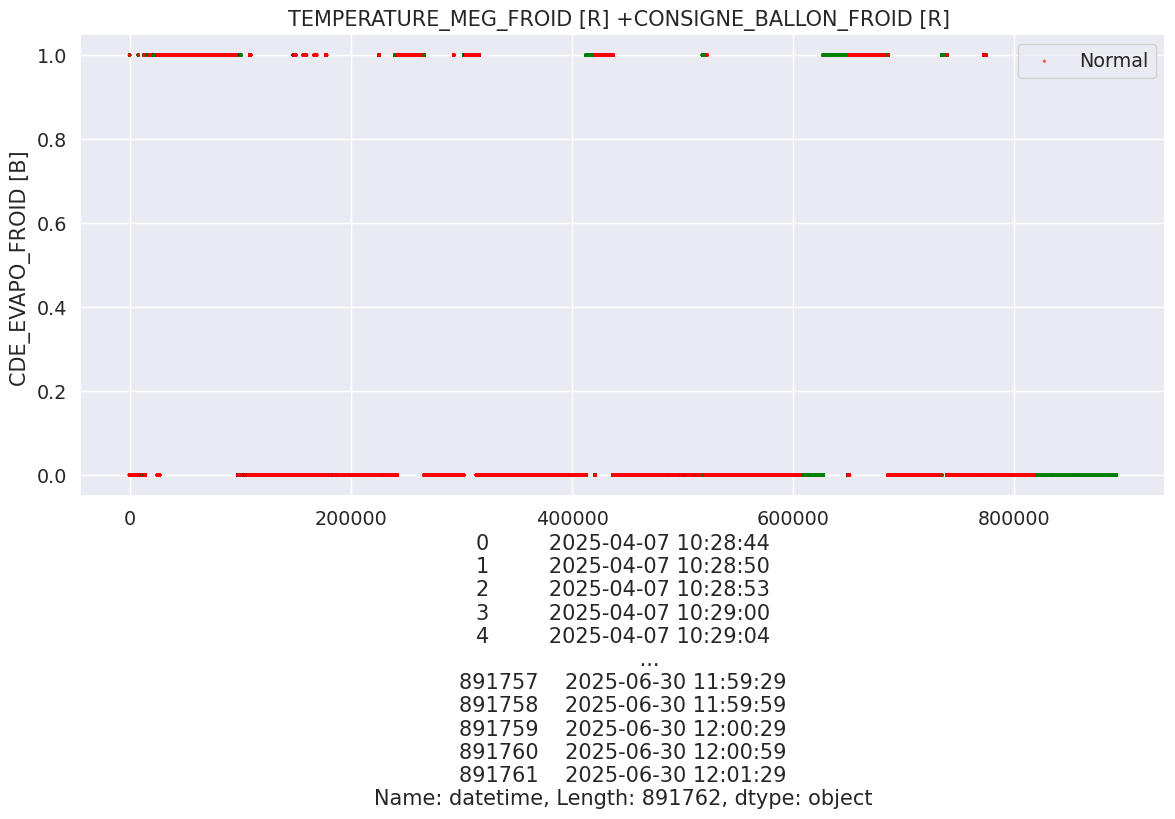

In [142]:
df =pd.read_csv('../datas/ECOLAB_3/E3_all_alert.csv' , sep=',')
#df = df[df['DEFAUT_COMPRESSEUR_HP [B]'].notnull()]
df = df.iloc[0:]
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Mapper une couleur par cluster
#colors = df['HP_R134_EN_DEGRES [R]'] > df['HP_R134_EN_DEGRES [R]'].median()
colors = df['alerte_temp_C1'].map({0: 'red', 1: 'green'})
colors_2 = df['POMPE_MEG_CHAUD [B]_C4'].map({0: 'purple', 1: 'black'})

#DEFAUT_COMPRESSEUR_HP [B]_C4
#DEFAUT_COMPRESSEUR_BP [B]_C4
#DEFAUT_COMPRESSEUR_1 [B]_C4
#DEFAUT_COMPRESSEUR_2 [B]_C4
# Tracer chaque variable (sur le même graphique) avec la couleur correspondant au cluster

#plt.scatter(df.index, df[''], c=colors, label='Prob-Reprise', alpha=1.0, s=2)
#plt.scatter(df.index, df['TEMPERATURE_MOY_SUP [R]'], c=colors_2, label='Prob-Consigne', alpha=1.0, s=2)

plt.scatter(df.index, df['MA_VARIATEUR [B]_C1'], c=colors, label='Normal', alpha=0.5, s=2)
#plt.scatter(df.index, df[''], c=colors_2, label='Normal', alpha=0.5, s=2)
#plt.scatter(df.index, df['TEMPERATURE_MOY_INF [R]'], c=colors_3, label='Prob-Consigne', alpha=1.0, s=2)
#plt.scatter(df.index, df['alerte_pred'], c=colors_4, label='Prob-Consigne', alpha=1.0, s=2)
plt.title('TEMPERATURE_MEG_FROID [R] +CONSIGNE_BALLON_FROID [R] ')
plt.xlabel(df['datetime'])
plt.ylabel('CDE_EVAPO_FROID [B] ' )
plt.legend()
plt.grid(True)
plt.show()

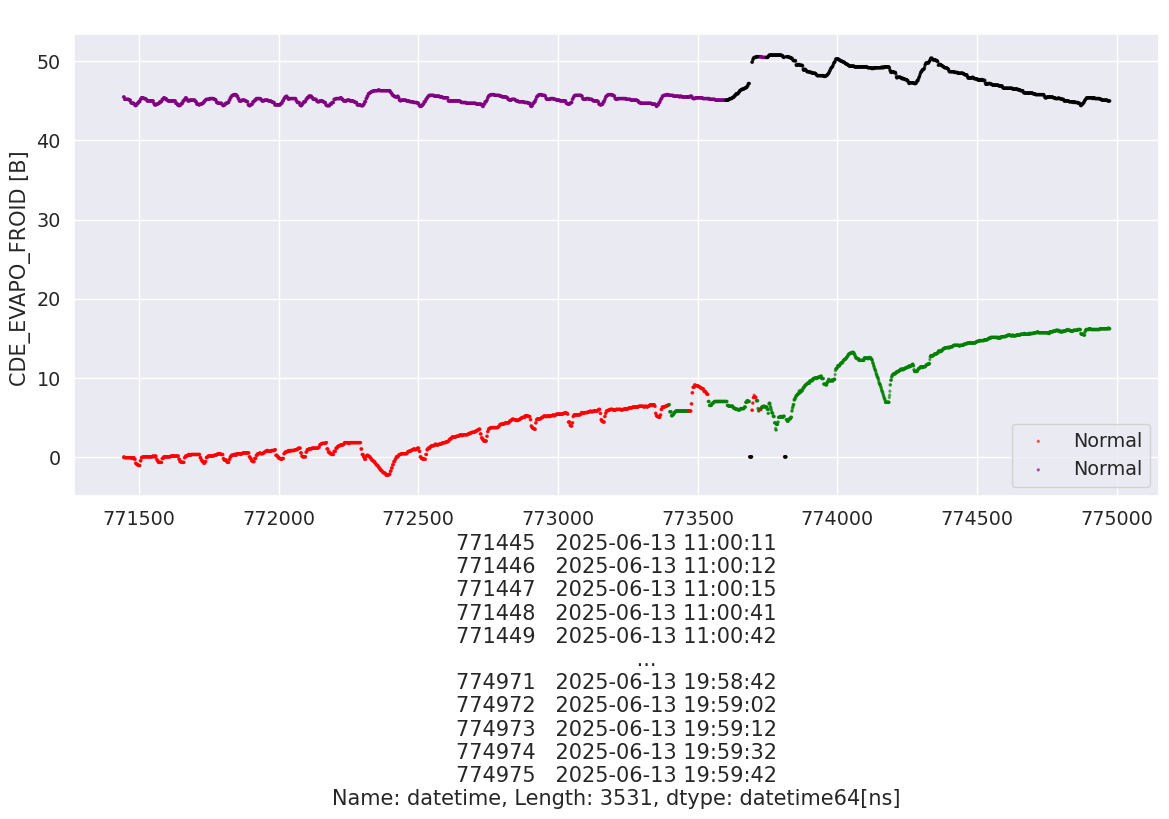

In [139]:
df = pd.read_csv('../datas/ECOLAB_3/E3_all_alert.csv', sep=',')
df['datetime'] = pd.to_datetime(df['datetime'])

#df['periode_test'] = ((df['datetime'] >= '2025-06-16 16:00:00') &
 #                     (df['datetime'] <= '2025-04-17 09:00:00')).astype(int)

df = df[df['datetime'] >= '2025-06-13 11:00:00']
df = df[df['datetime'] <= '2025-06-13 20:00:00']
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Mapper une couleur par cluster
#colors = df['HP_R134_EN_DEGRES [R]'] > df['HP_R134_EN_DEGRES [R]'].median()
colors = df['DEFAUT_HP [B]_C1'].map({0: 'red', 1: 'green'})
colors_2 = df['DEFAUT_COMPRESSEUR_HP [B]_C4'].map({0: 'purple', 1: 'black'})


# Tracer chaque variable (sur le même graphique) avec la couleur correspondant au cluster

#plt.scatter(df.index, df['TEMPERATURE_MOY_INF [R]'], c=colors, label='Prob-Reprise', alpha=1.0, s=2)
#plt.scatter(df.index, df['TEMPERATURE_MOY_SUP [R]'], c=colors_2, label='Prob-Consigne', alpha=1.0, s=2)

plt.scatter(df.index, df['TEMPERATURE_MEG_FROID [R]_C4'], c=colors, label='Normal', alpha=0.5, s=2)
plt.scatter(df.index, df['TEMPERATURE_MEG_CHAUD [R]_C4'], c=colors_2, label='Normal', alpha=0.5, s=2)
#plt.scatter(df.index, df['TEMPERATURE_MOY_INF [R]'], c=colors_3, label='Prob-Consigne', alpha=1.0, s=2)
#plt.scatter(df.index, df['alerte_pred'], c=colors_4, label='Prob-Consigne', alpha=1.0, s=2)
plt.title(' ')
plt.xlabel(df['datetime'])
plt.ylabel('CDE_EVAPO_FROID [B] ' )
plt.legend()
plt.grid(True)
plt.show()

In [144]:
import pandas as pd


df = pd.read_csv('../datas/ECOLAB_3/E3_all_alert.csv', sep=',')
print(df.head())

   Unnamed: 0             datetime  BP [R]_C1  HP [R]_C1  O2 [R]_C1  \
0           0  2025-04-07 10:28:44   0.000000   0.000000        0.0   
1           1  2025-04-07 10:28:50 -14.528214  33.102051  1638300.0   
2           2  2025-04-07 10:28:53 -14.528214  33.102051  1638300.0   
3           3  2025-04-07 10:29:00 -14.528214  33.102051  1638300.0   
4           4  2025-04-07 10:29:04 -14.528214  33.102051  1638300.0   

   CO2 [R]_C1  O2_MMOL [R]_C1  POIDS_1 [R]_C1  POIDS_2 [R]_C1  POIDS_3 [R]_C1  \
0         0.0             0.0    -1000.000000    -1000.000000    -1000.000000   
1       359.0             0.0      178.333333      158.333333      157.666667   
2       359.0             0.0      178.333333      158.333333      157.666667   
3       359.0             0.0      178.333333      158.333333      157.666667   
4       359.0             0.0      178.333333      158.333333      157.666667   

   ...  ecart_temp_C2  alerte_temp_C2  ecart_temp_C3  alerte_temp_C3  \
0  ...        